In [1]:
# %load_ext lab_black

# Name    : Alli Khadga Jyoth
# Roll.No : 19024

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import bandit_envi as be
import math as m

# Q 1

##

In [3]:
arms = be.bandit_env([2.5, -3.5, 1.0, 5.0, -2.5], [0.33, 1.0, 0.66, 1.98, 1.65])

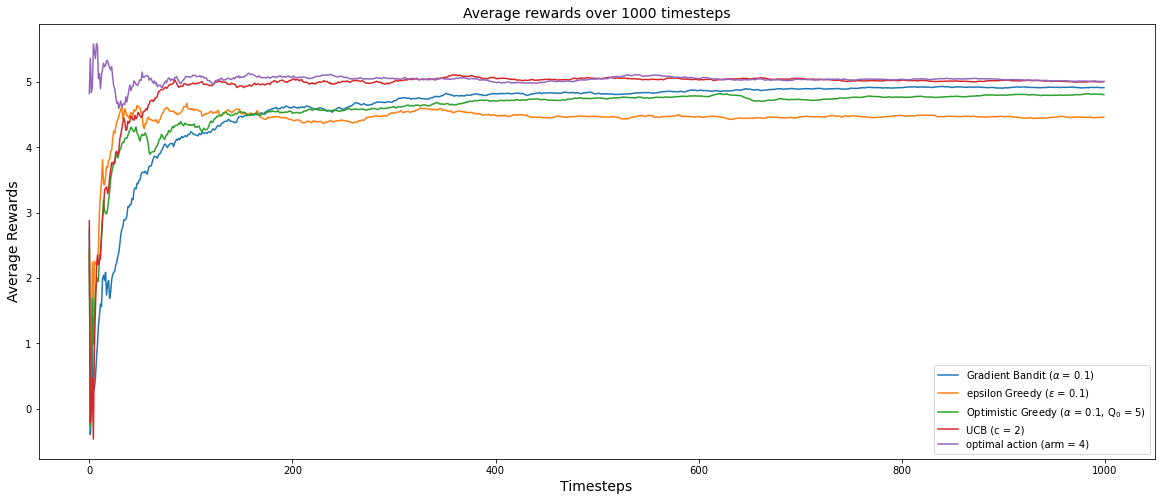

In [4]:
class MAB:
    def __init__(self, arms):
        self.arms = arms
        self.bandits = self.arms.n
        self.actions = np.arange(self.bandits)
        self.optimal_act = np.argmax(np.array(self.arms.r_mean))

    def action(self, a):
        reward = self.arms.pull(a)
        return reward

    def update_mean(self, reward, a, Nt, mean):
        mean[a] = mean[a] + 1 / Nt[a] * (reward - mean[a])
        return mean

    def update_ucb(self, ucb, a, Nt, c, timestep, mean):
        ucb[a] = mean[a] + c * np.sqrt(np.log(timestep) / Nt[a])
        for i, n in enumerate(Nt):
            if n == 0:
                ucb[i] = 1e500
        return ucb

    def update_opg(self, reward, a, mean, alpha):
        mean[a] = alpha * reward + (1 - alpha) * mean[a]
        return mean

    def prob_update(self, prob, H):
        prob = np.exp(H - H.max()) / np.sum(np.exp(H - H.max()))
        return prob

    def update_grad(self, reward, mean_reward, a, alpha, H, prob):
        for act in self.actions:
            if act == a:
                H[act] = H[act] + alpha * (reward - mean_reward) * (1 - prob[act])
            else:
                H[act] = H[act] - alpha * (reward - mean_reward) * prob[act]
        return H

    def total_mean_update(self, reward, timestep, mean_reward):
        mean_reward = mean_reward + (reward - mean_reward) * 1 / timestep
        return mean_reward

    def ep_greedy(
        self,
        ep=0.1,
        N=1000,
        init_val=0,
        return_data=0,
        plot_fig=True,
        show_optimal=True,
    ):

        mean = np.ones(self.bandits) * init_val
        returns = []
        Nt = np.zeros(self.bandits)
        actions = np.arange(self.bandits)
        optimal_return = []

        for timestep in range(1, N + 1):
            if np.random.rand() <= ep:
                a = np.random.choice(actions)
            else:
                a = np.argmax(mean)

            for act, n in enumerate(Nt):
                if n == 0:
                    a = act
                    break
            Nt[a] += 1
            reward = self.action(a)
            mean = self.update_mean(reward, a, Nt, mean)
            returns.append(reward)
            if show_optimal == True:
                optimal_reward = self.action(self.optimal_act)
                optimal_return.append(optimal_reward)

        if plot_fig == True:
            cumulative_average = np.cumsum(returns) / (np.arange(N) + 1)
            plt.plot(
                cumulative_average, label=r"epsilon Greedy ($\epsilon$ = " + f"{ep})"
            )
            plt.title(f"Average rewards over {N} timesteps", fontsize=14)
            plt.xlabel("Timesteps", fontsize=14)
            plt.ylabel("Average Rewards", fontsize=14)

            if show_optimal == True:
                cumulative_averageoptimal_act = np.cumsum(optimal_return) / (
                    np.arange(N) + 1
                )
                plt.plot(cumulative_averageoptimal_act, label="optimal value")
            #                 plt.legend([f"epsilon (ep = {ep})"])
            plt.legend()
        if return_data == True:
            return returns

    def UCB(
        self, c=2, N=1000, init_val=0, return_data=0, show_optimal=True, plot_fig=True
    ):

        mean = np.ones(self.bandits) * init_val
        ucb = np.zeros(self.bandits)
        returns = []
        Nt = np.zeros(self.bandits)
        actions = np.arange(self.bandits)
        optimal_return = []
        for timestep in range(1, N + 1):
            a = np.argmax(ucb)
            Nt[a] += 1
            reward = self.action(a)
            mean = self.update_mean(reward, a, Nt, mean)
            ucb = self.update_ucb(ucb, a, Nt, c, timestep, mean)
            returns.append(reward)
            if show_optimal == True:
                optimal_reward = self.action(self.optimal_act)
                optimal_return.append(optimal_reward)

        if plot_fig == True:
            cumulative_average = np.cumsum(returns) / (np.arange(N) + 1)
            plt.plot(cumulative_average, label=f"UCB (c = {c})")
            plt.title(f"Average rewards over {N} timesteps", fontsize=14)
            plt.xlabel("Timesteps", fontsize=14)
            plt.ylabel("Average Rewards", fontsize=14)

            if show_optimal == True:
                cumulative_averageoptimal_act = np.cumsum(optimal_return) / (
                    np.arange(N) + 1
                )
                plt.plot(cumulative_averageoptimal_act, label="optimal value")
            #                 plt.legend([f"epsilon (ep = {ep})"])
            plt.legend()

        if return_data == True:
            return returns

    def op_greedy(
        self,
        alpha=0.1,
        N=1000,
        init_val=5,
        return_data=0,
        show_optimal=True,
        plot_fig=True,
    ):

        mean = np.ones(self.bandits) * init_val
        returns = []
        Nt = np.zeros(self.bandits)
        actions = np.arange(self.bandits)
        optimal_return = []
        for timestep in range(1, N + 1):
            a = np.argmax(mean)

            for act, n in enumerate(Nt):
                if n == 0:
                    a = act
                    break
            Nt[a] += 1
            reward = self.action(a)
            mean = self.update_opg(reward, a, mean, alpha)
            returns.append(reward)
            if show_optimal == True:
                optimal_reward = self.action(self.optimal_act)
                optimal_return.append(optimal_reward)

        if plot_fig == True:
            cumulative_average = np.cumsum(returns) / (np.arange(N) + 1)
            plt.plot(
                cumulative_average,
                label=r"Optimistic Greedy ($\alpha$ = "
                + f'{alpha}, {r"Q$_{0}$"} = {init_val})',
            )
            plt.title(f"Average rewards over {N} timesteps", fontsize=14)
            plt.xlabel("Timesteps", fontsize=14)
            plt.ylabel("Average Rewards", fontsize=14)

            if show_optimal == True:
                cumulative_averageoptimal_act = np.cumsum(optimal_return) / (
                    np.arange(N) + 1
                )
                plt.plot(cumulative_averageoptimal_act, label="optimal value")
            #                 plt.legend([f"epsilon (ep = {ep})"])
            plt.legend()

        if return_data == True:
            return returns

    def gradient_bandit(
        self,
        alpha=0.1,
        N=1000,
        init_val=0,
        return_data=0,
        show_optimal=True,
        plot_fig=True,
    ):

        self.bandits = arms.n
        mean = np.ones(self.bandits) * init_val
        mean_reward = 0
        returns = []
        H = np.zeros(self.bandits)
        prob = np.zeros(self.bandits)
        Nt = np.zeros(self.bandits)
        actions = np.arange(self.bandits)
        optimal_return = []

        for timestep in range(1, N + 1):
            prob = self.prob_update(prob, H)

            a = np.random.choice(actions, p=prob)

            for act, n in enumerate(Nt):
                if n == 0:
                    a = act
                    break

            Nt[a] += 1
            reward = self.action(a)
            H = self.update_grad(reward, mean_reward, a, alpha=alpha, H=H, prob=prob)
            mean_reward = self.total_mean_update(reward, timestep, mean_reward)

            returns.append(reward)

            if show_optimal == True:
                optimal_reward = self.action(self.optimal_act)
                optimal_return.append(optimal_reward)

        if plot_fig == True:
            cumulative_average = np.cumsum(returns) / (np.arange(N) + 1)
            plt.plot(
                cumulative_average, label=r"Gradient Bandit ($\alpha$ = " + f"{alpha})"
            )
            plt.title(f"Average rewards over {N} timesteps", fontsize=14)
            plt.xlabel("Timesteps", fontsize=14)
            plt.ylabel("Average Rewards", fontsize=14)

            if show_optimal == True:
                cumulative_averageoptimal_act = np.cumsum(optimal_return) / (
                    np.arange(N) + 1
                )
                plt.plot(cumulative_averageoptimal_act, label="optimal value")
            #                 plt.legend([f"epsilon (ep = {ep})"])
            plt.legend()

        if return_data == True:
            return returns

    def optimal_arm(self, N=1000, return_data=False, plot_fig=True):
        optimal_return = []
        for timestep in range(1, N + 1):
            optimal_reward = self.action(self.optimal_act)
            optimal_return.append(optimal_reward)

        if plot_fig == True:
            cumulative_averageoptimal_act = np.cumsum(optimal_return) / (
                np.arange(N) + 1
            )
            plt.plot(
                cumulative_averageoptimal_act,
                label=f"optimal action (arm = {self.optimal_act +1 })",
            )
            plt.legend()

            if return_data == True:
                return optimal_return


plt.figure(figsize=[20, 8])
# plt.semilogx(base =10)
MAB(arms).gradient_bandit(show_optimal=False)
MAB(arms).ep_greedy(show_optimal=False)
MAB(arms).op_greedy(show_optimal=False)
MAB(arms).UCB(show_optimal=False)
MAB(arms).optimal_arm()

##

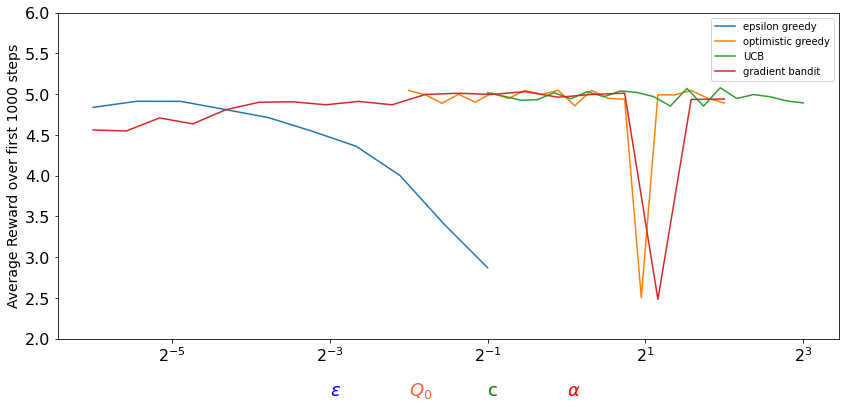

In [5]:
para_greedy = np.logspace(-6, -1, 10, base=2)
para_grad = np.logspace(-6, 2, 20, base=2)
para_ucb = np.logspace(-1, 3, 20, base=2)
para_opgreedy = np.logspace(-2, 2, 20, base=2)
# para_opgreedy


reward_ep_greedy_mean = []
reward_op_greedy_mean = []
reward_ucb_mean = []
reward_grad_mean = []
for parameter in para_greedy:
    reward_ep_greedy_mean.append(
        np.average(MAB(arms).ep_greedy(ep=parameter, plot_fig=False, return_data=True))
    )

for parameter in para_opgreedy:
    reward_op_greedy_mean.append(
        np.average(
            MAB(arms).op_greedy(init_val=parameter, plot_fig=False, return_data=True)
        )
    )
for parameter in para_ucb:
    reward_ucb_mean.append(
        np.average(MAB(arms).UCB(c=parameter, plot_fig=False, return_data=True))
    )

for parameter in para_grad:
    reward_grad_mean.append(
        np.average(
            MAB(arms).gradient_bandit(alpha=parameter, plot_fig=False, return_data=True)
        )
    )

plt.figure(figsize=[14, 6])
plt.ylim([2, 6])
plt.semilogx(base=2)
plt.plot(para_greedy, reward_ep_greedy_mean, label="epsilon greedy")
plt.plot(para_opgreedy, reward_op_greedy_mean, label="optimistic greedy")
plt.plot(para_ucb, reward_ucb_mean, label="UCB")
plt.plot(para_grad, reward_grad_mean, label="gradient bandit")
plt.ylabel("Average Reward over first 1000 steps", fontsize=14)
# plt.xlabel(r"$ \text{$\color{red}{\epsilon}$ $\alpha$ ,$c$  Q_${0}$}$", fontsize=20)
plt.text(2 ** -3, 1.3, r"$\epsilon$", color="b", fontsize=18)
plt.text(2 ** -2, 1.3, r"$Q_{0}$", color="#FF6133", fontsize=18)
plt.text(2 ** -1, 1.3, "c", color="g", fontsize=18)
plt.text(2 ** -0, 1.3, r"$\alpha$", color="r", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

# Q 2

![MDP](mdp.drawioa.png)

##

### Value Iteration

In [6]:
S = np.array(["Hostel", "AB", "Canteen"])
A = np.array(["hungry", "AttendClass"])
R = np.array([-1, 3, 1])  # initial reward or V0
P = np.array(
    [
        [[0, 0, 1], [0.5, 0.5, 0]],
        [[0, 0.2, 0.8], [0, 0.7, 0.3]],
        [[0, 0, 1], [0.3, 0.6, 0.1]],
    ]
)
V = np.zeros(3)
V_prev = np.array([-1, 3, 1])
gamma = 0.9
delta = 0.01
best_action_val_iter = {}

# The value iteration loop
for timestep in range(100):
    V = R + 0.9 * np.max(np.sum(V_prev * P, axis=2), axis=1)

    if np.max(np.abs(V_prev - V)) <= delta:
        #         print('iteration', timestep,V)
        break
    V_prev = V.copy()

# Finding the Best action policy pi*(S)
print(
    f"State : Optimal Value : Optimal Policy, Convergence time = {timestep+1}", end="\n\n"
)
for i, state in enumerate(S):
    for action in A[np.argmax(np.sum(V_prev * P, axis=2), axis=1)]:
        best_action_val_iter[state] = action
    print(f"{state} : {V[i]} : {best_action_val_iter[state]}")

State : Optimal Value : Optimal Policy, Convergence time = 51

Hostel : 15.970934292979997 : AttendClass
AB : 21.76120995442895 : AttendClass
Canteen : 18.741401116639782 : AttendClass


##

### Policy Iteration

In [7]:
S = np.array(["Hostel", "AB", "Canteen"])
A = np.array(["hungry", "AttendClass"])
R = np.array([-1, 3, 1])  # initial reward or V0
P = np.array(
    [
        [[0, 0, 1], [0.5, 0.5, 0]],
        [[0, 0.2, 0.8], [0, 0.7, 0.3]],
        [[0, 0, 1], [0.3, 0.6, 0.1]],
    ]
)
V = np.zeros(3)
V_prev = np.array([-1, 3, 1])
gamma = 0.9
count = 0

best_action_policy_iter = {}

policy = np.random.randint(low=A.shape[0], size=3)
policy_prev = policy.copy()

for timestep in range(100):
    a = []
    b = R.copy() * -1 
    for ind,pol in enumerate(policy):
        x = np.array([0,0,0])
        x[ind]  = 1
        a.append(0.9 * P[ind,pol] - x)
    a = np.asarray(a)
    V = np.linalg.solve(a,b)
    
    policy = np.argmax(np.sum(V * P, axis=2), axis=1)

    if not (policy_prev - policy).any():
        count += 1
        if count == 2:
            #             print(A[policy], timestep, V)
            break
    else:
        count = 0

    policy_prev = policy.copy()
    V_prev = V.copy()


print(f"State : Optimal Policy, Convergence time = {timestep+1}", end="\n\n")
for state, action in zip(S, policy):
    best_action_policy_iter[state] = A[action]
    print(f"{state} : {best_action_policy_iter[state]}")

State : Optimal Policy, Convergence time = 3

Hostel : AttendClass
AB : AttendClass
Canteen : AttendClass


#

### Discussion

>
The results obtained shows the value iteration and policy iteration both gives optimal policy but, from the convergence time it can be seen that the policy iteration performs better in this particular case where the actions are fewer compared to states.